# Super-K meeting : CNN postprocessing analysis

In [1]:
# Python library and module imports
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)

In [3]:
# Import the custom plotting module
from plot_utils import plot_utils

# 1. Import the np arrays with the outputs from the CNN

In [4]:
# Validation run number
run = 7

# Load the np array from the disk into memory
softmaxes = np.load("softmax" + str(run) + ".npy")
labels = np.load("labels" + str(run) + ".npy")
predictions = np.load("predictions" + str(run) + ".npy")
energies = np.load("energies" + str(run) + ".npy")

# Reshape the deformed arrays
energies = energies.reshape(energies.shape[0]*energies.shape[1], -1)

In [5]:
# Validate the shapes of the loaded array
print("softmaxes shape : ", softmaxes.shape)
print("labels shape : ", labels.shape)
print("predictions shape : ", predictions.shape)
print("energies shape : ", energies.shape)

softmaxes shape :  (90000, 3)
labels shape :  (90000,)
predictions shape :  (90000,)
energies shape :  (90000, 1)


# 2. Plot the energy distribution w.r.t. different particle types

In [6]:
# Extract the energies for various particle types
energies_dict = {}
for label in np.unique(labels):
    energies_dict[label] = energies[labels==label]

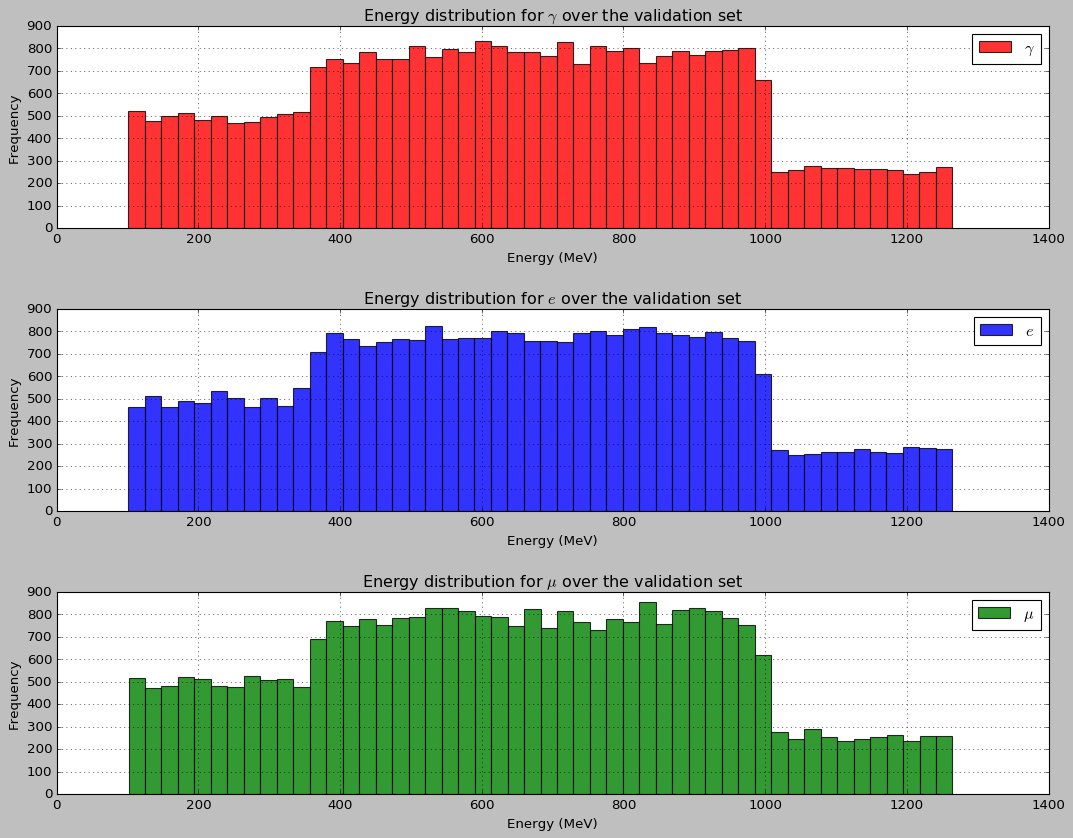

In [12]:
label_dict = {0:["gamma","r"], 1:["e","b"], 2:["mu","g"]}

fig, axes = plt.subplots(3,1,figsize=(16,12))
plt.subplots_adjust(hspace=0.4)

for label in energies_dict.keys():
    label_to_use = r"$\{0}$".format(label_dict[label][0]) if label_dict[label][0] is not "e" else r"${0}$".format(label_dict[label][0])
    axes[label].hist(energies_dict[label], bins=50, density=False, label=label_to_use, alpha=0.8,
                    color=label_dict[label][1])
    axes[label].legend()
    axes[label].grid(True, which="both", axis="both")
    axes[label].set_ylabel("Frequency")
    axes[label].set_xlabel("Energy (MeV)")
    axes[label].set_title("Energy distribution for " + label_to_use + " over the validation set")

# 3. Setup the energy intervals to be used for the plots

In [6]:
energy_interval = 200
energy_lb = [energy_interval*i for i in range(math.ceil(max(energies)/energy_interval))]
print(energy_lb)

[0, 200, 400, 600, 800, 1000, 1200]


In [7]:
energy_ub = [i+energy_interval for i in energy_lb]

# 4. Plot the confusion matrix for various energy intervals

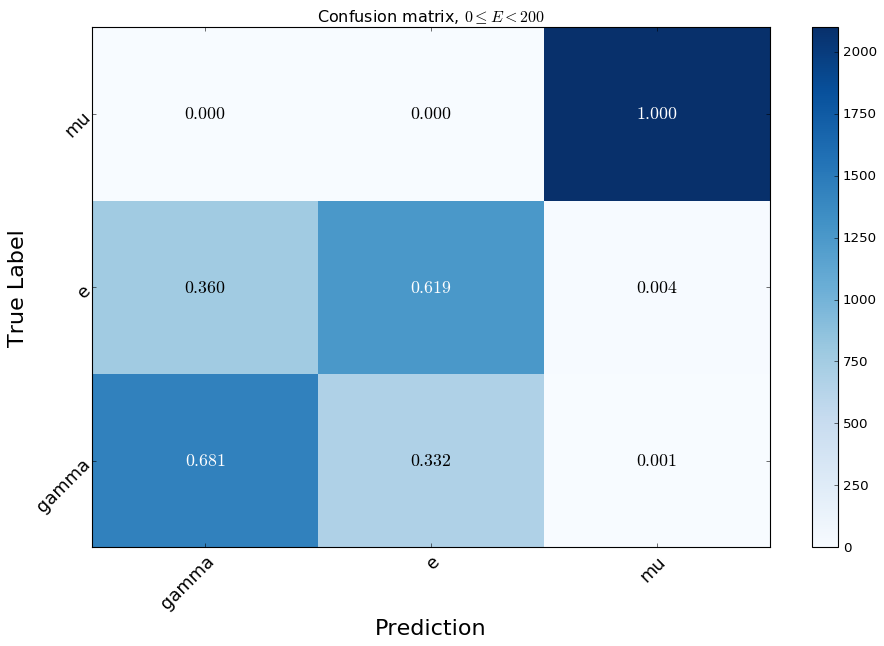

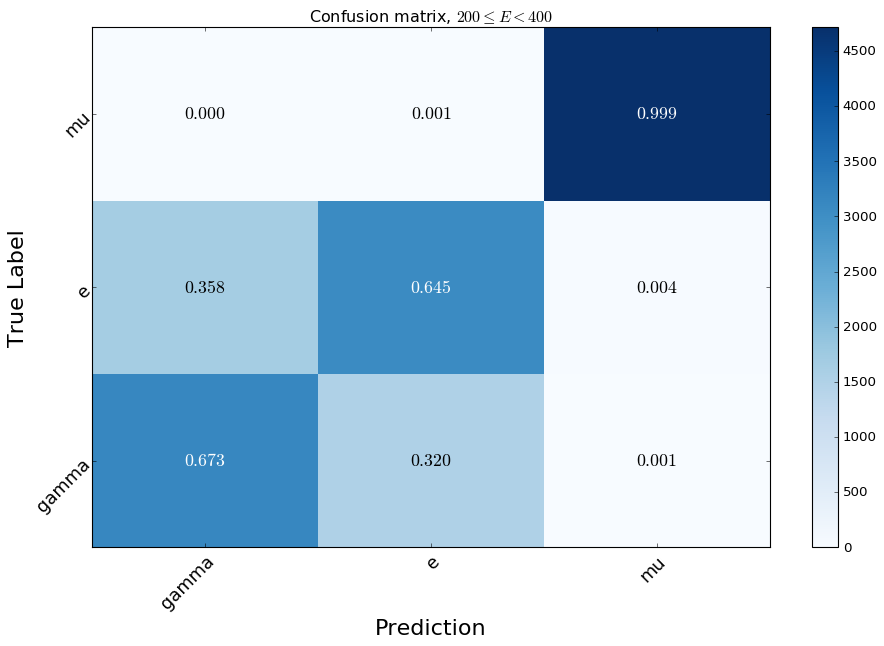

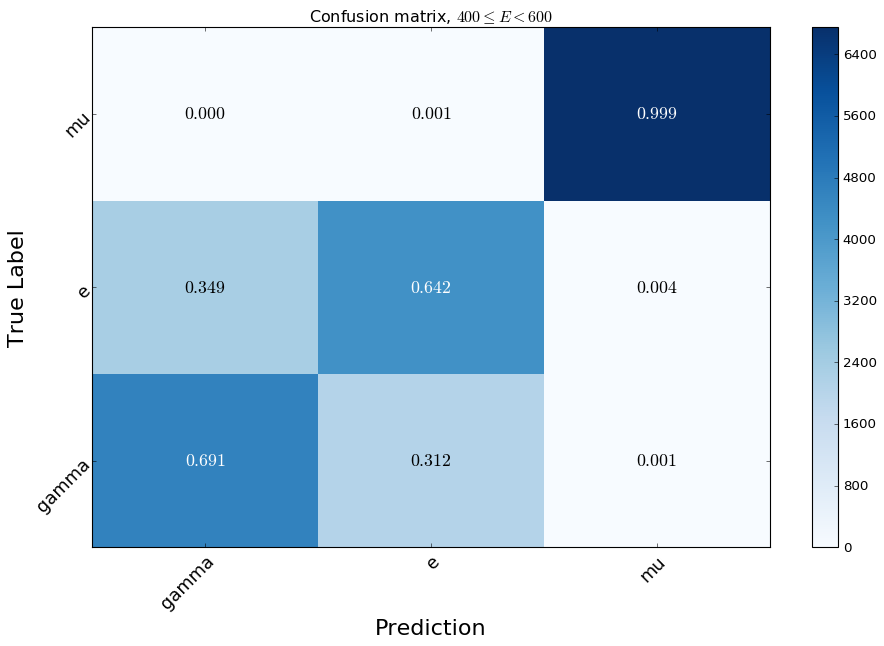

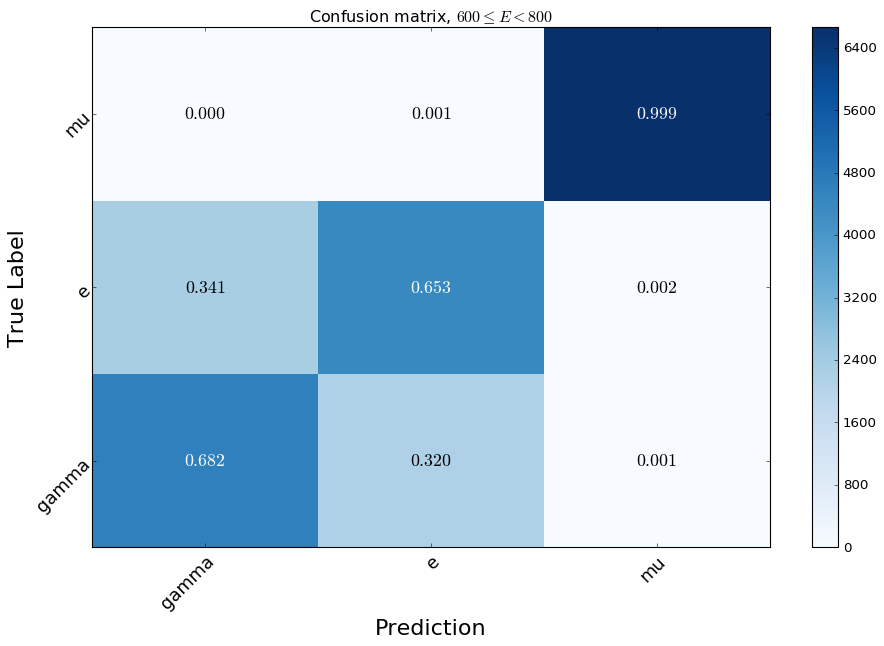

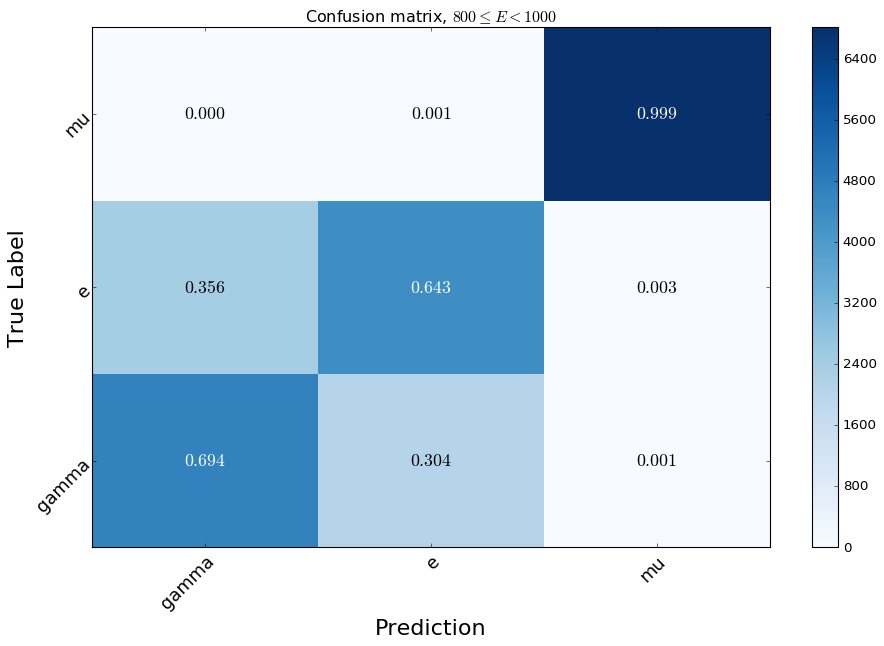

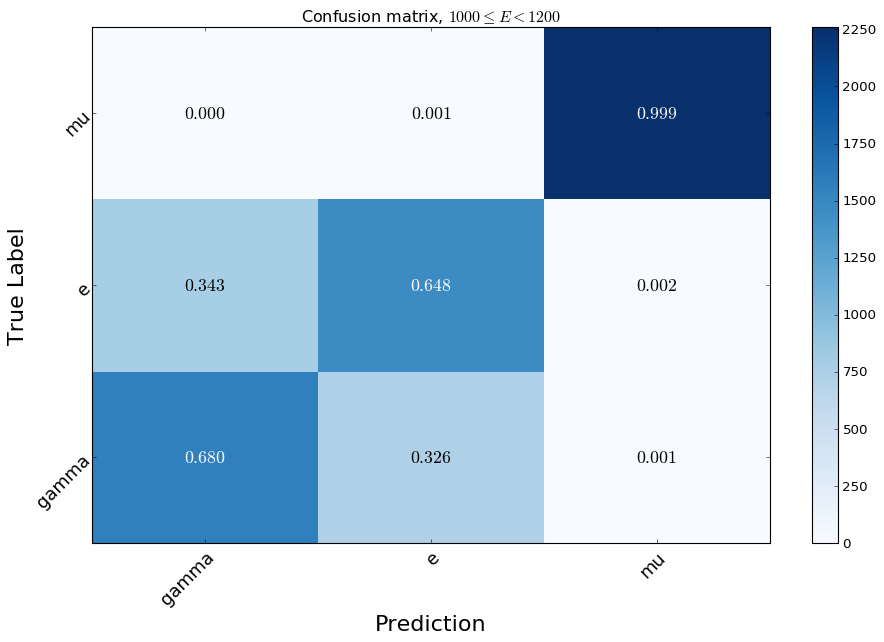

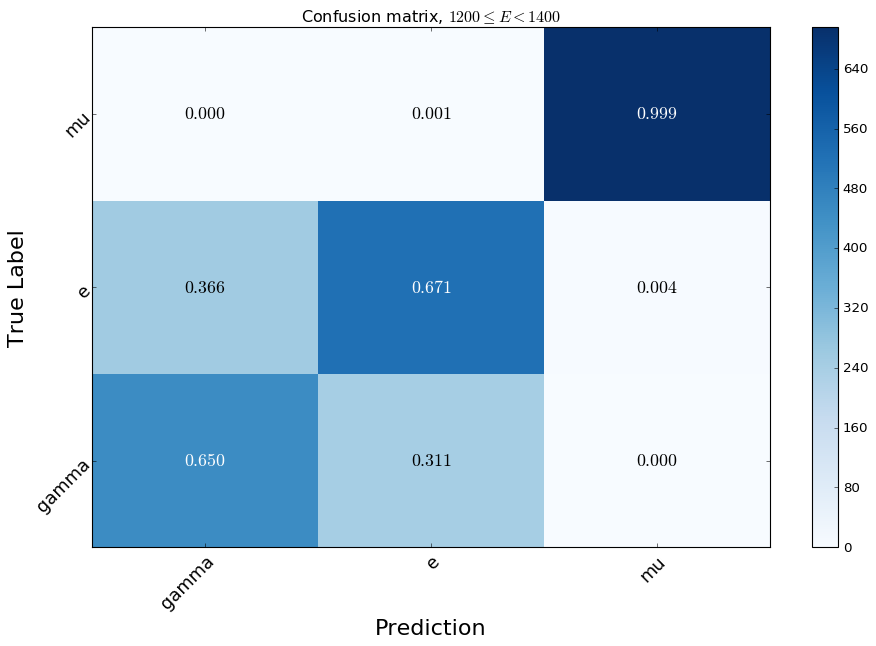

In [8]:
# Iterate over the energy intervals and plot the confusion matrix
for energy_lower, energy_upper in zip(energy_lb, energy_ub):
    plot_utils.plot_confusion_matrix(labels, predictions, energies, ["gamma", "e", "mu"], energy_lower, energy_upper)

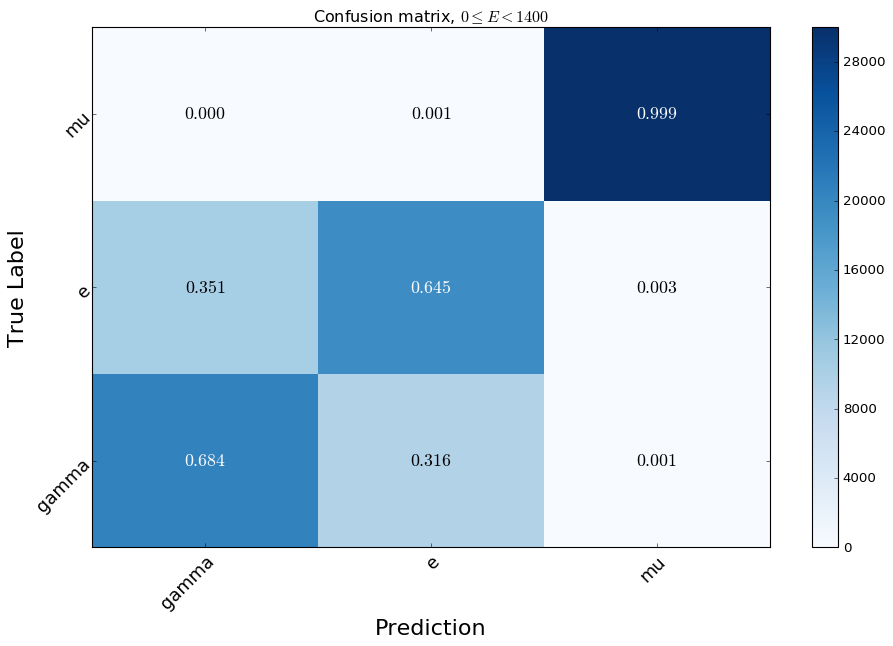

In [7]:
plot_utils.plot_confusion_matrix(labels, predictions, energies, ["gamma", "e", "mu"], 0, 1400)

# 5. Plot the softmax overlap for various energy intervals 

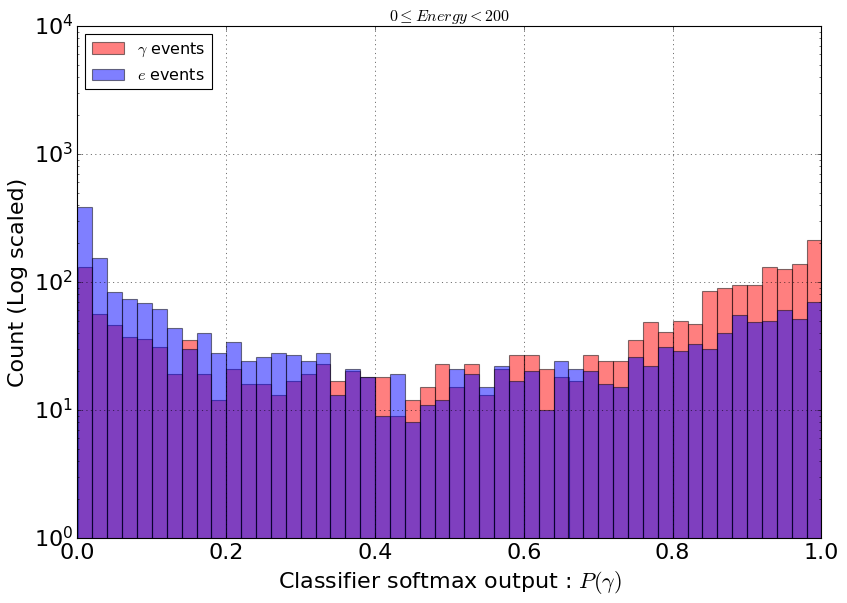

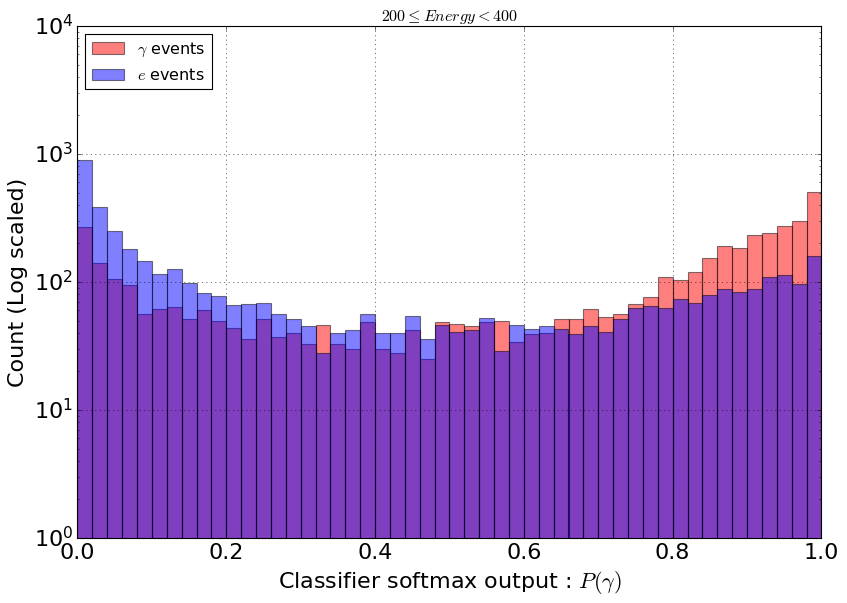

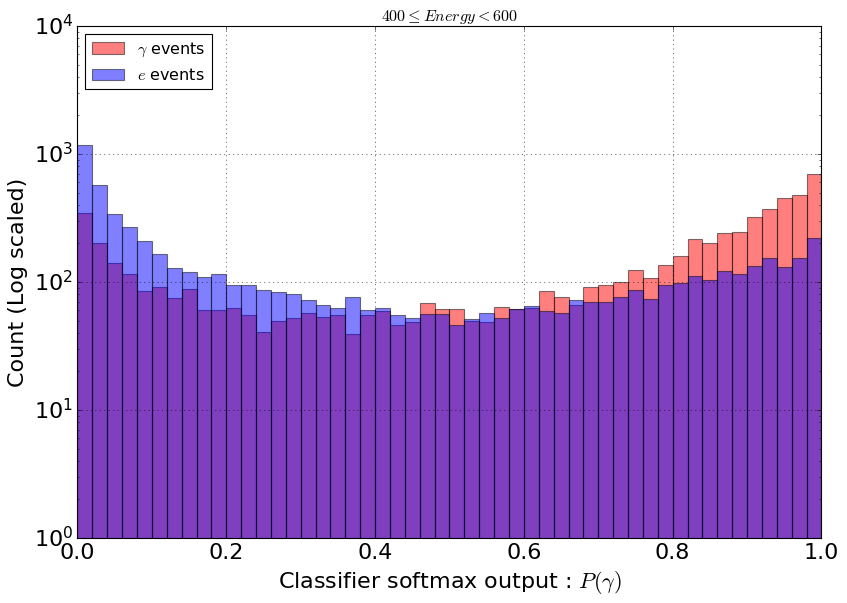

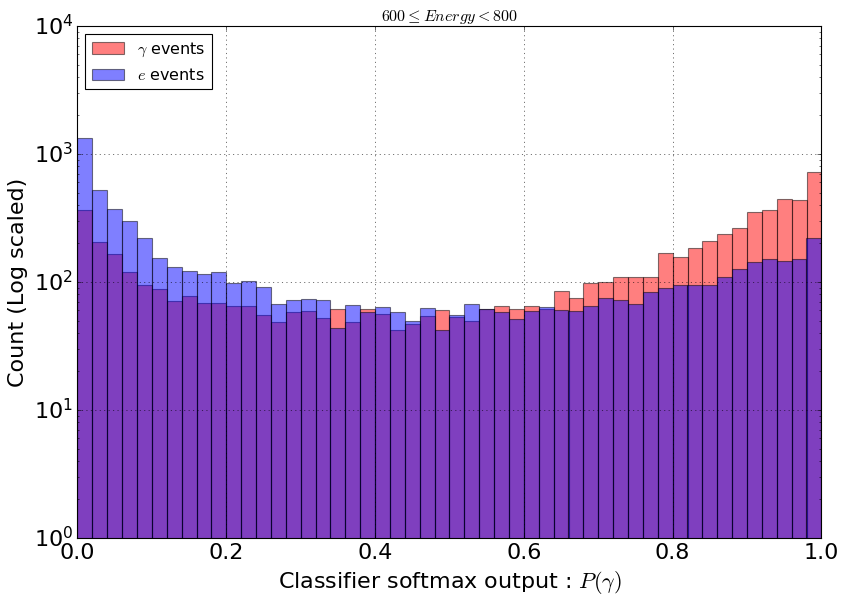

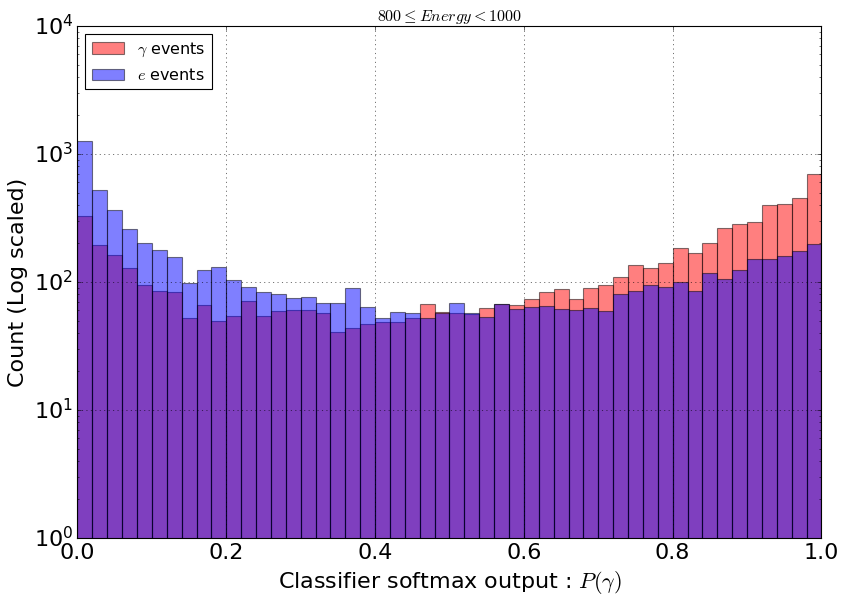

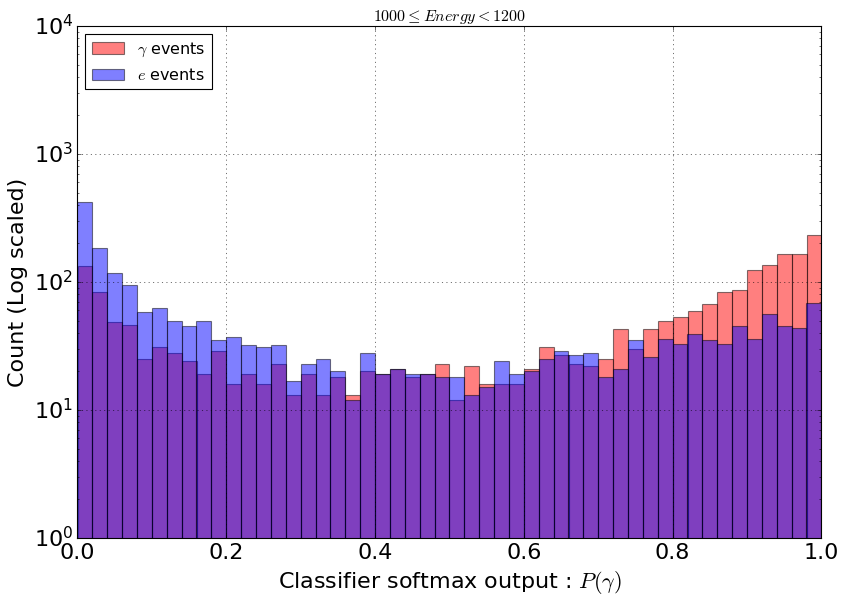

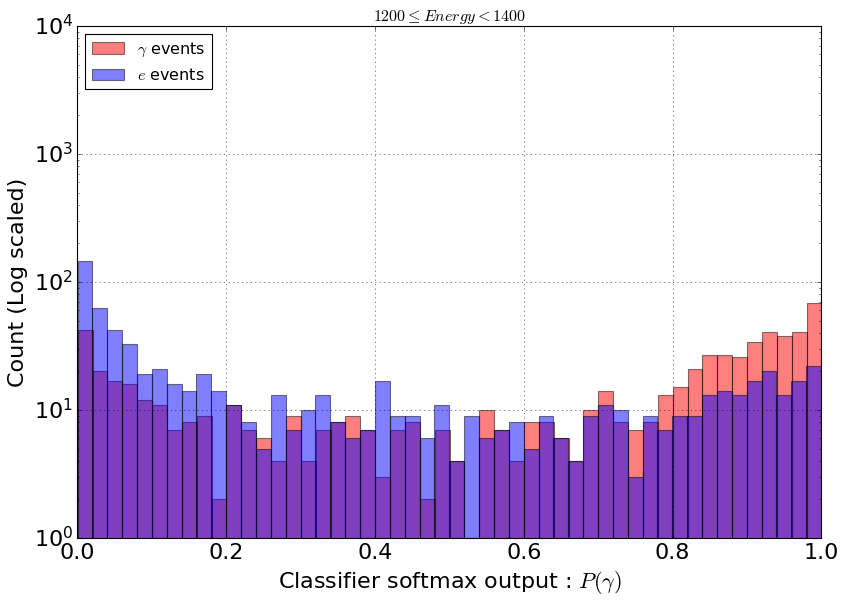

In [9]:
# Iterate over the energy intervals and plot the softmax overlap plots
for energy_lower, energy_upper in zip(energy_lb, energy_ub):
    plot_utils.plot_particle_histogram(softmaxes, labels, energies, {"gamma":0, "e":1},
                                      "gamma", energy_lower, energy_upper)

In [11]:
print(energy_lb, energy_ub)

[0, 200, 400, 600, 800, 1000, 1200] [200, 400, 600, 800, 1000, 1200, 1400]


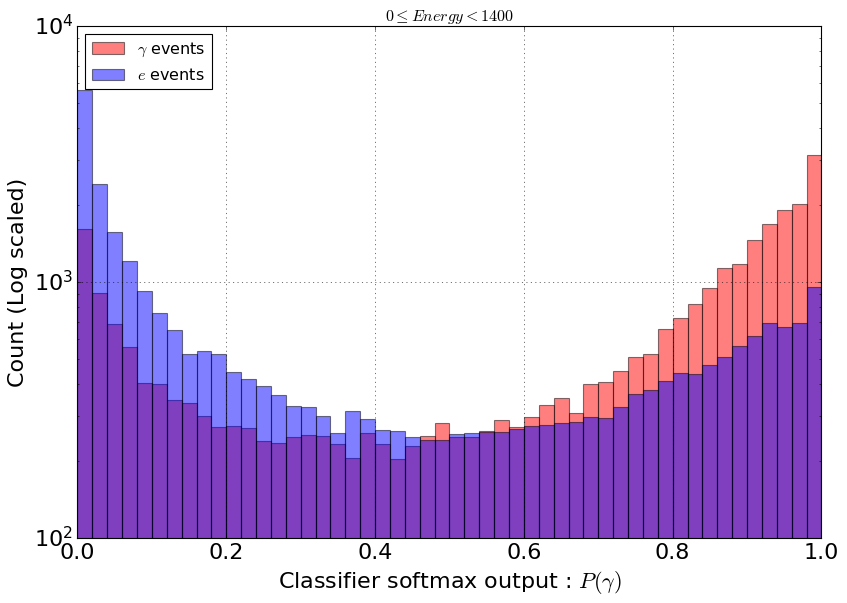

In [8]:
plot_utils.plot_particle_histogram(softmaxes, labels, energies, {"gamma":0, "e":1},
                                      "gamma", 0, 1400)

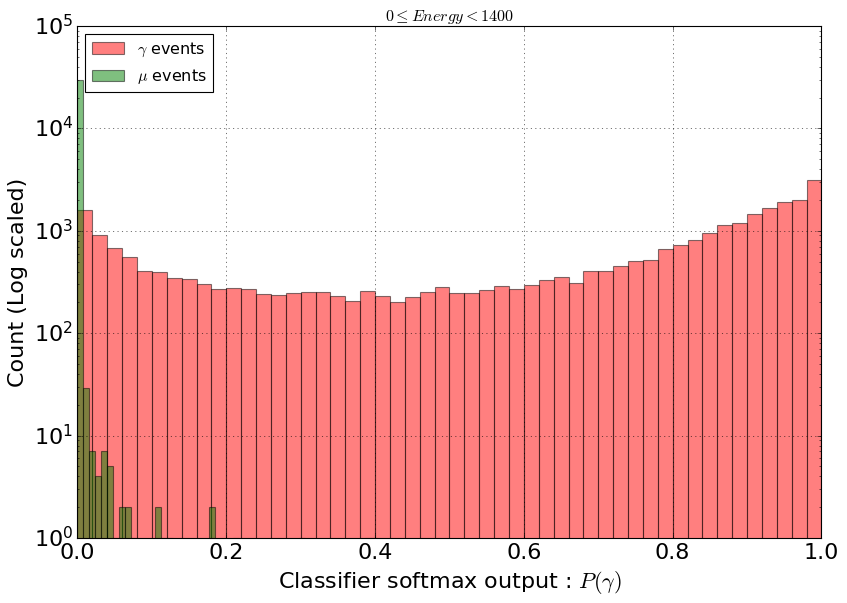

In [9]:
plot_utils.plot_particle_histogram(softmaxes, labels, energies, {"gamma":0, "mu":2},
                                      "gamma", 0, 1400)

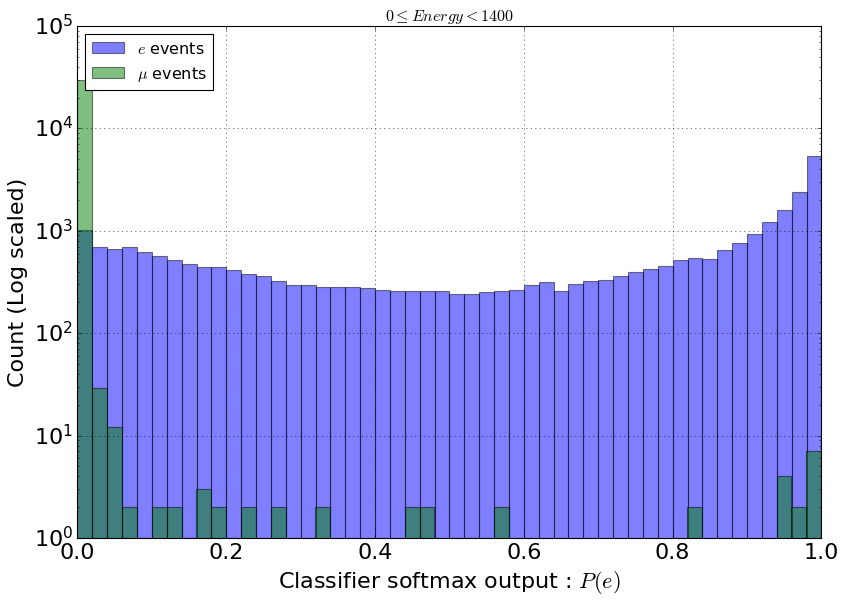

In [10]:
plot_utils.plot_particle_histogram(softmaxes, labels, energies, {"e":1, "mu":2},
                                      "e", 0, 1400)

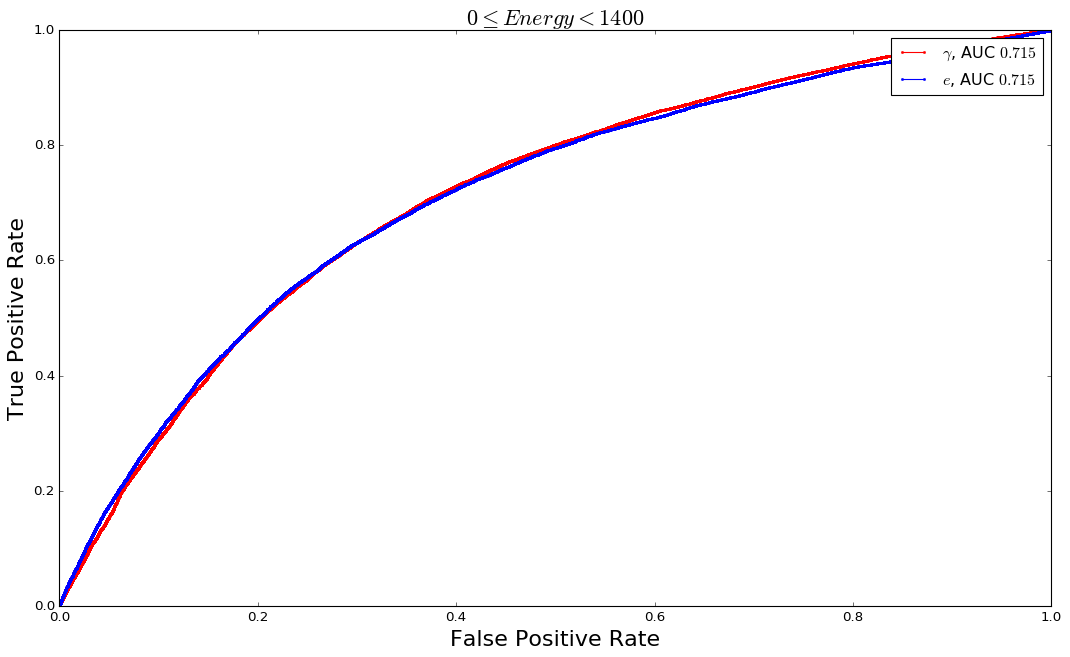

In [8]:
plot_utils.plot_ROC_curve_one_vs_one(softmaxes, labels, energies, {"gamma":0, "e":1}, "gamma", "e", 0, 1400)

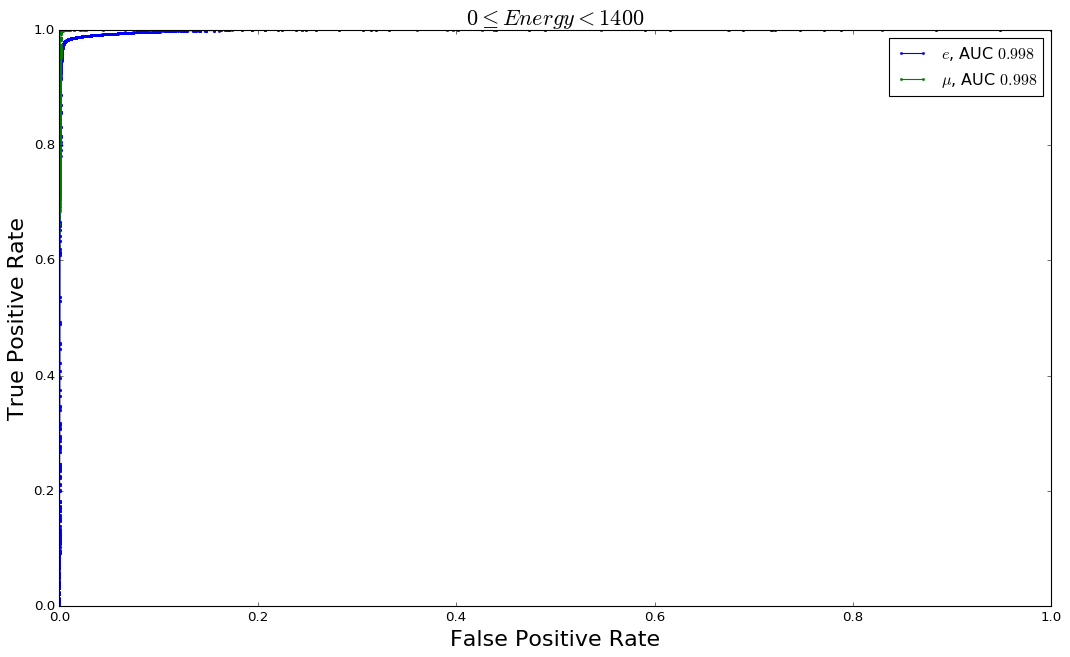

In [11]:
plot_utils.plot_ROC_curve_one_vs_one(softmaxes, labels, energies, {"e":1, "mu":2}, "e", "mu", 0, 1400)

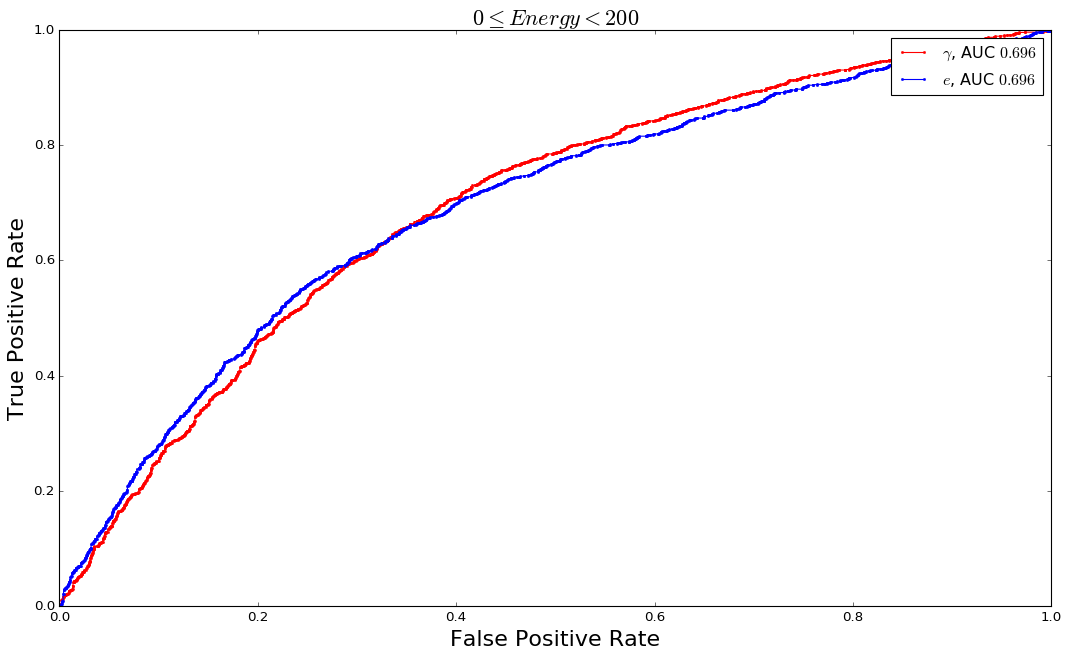

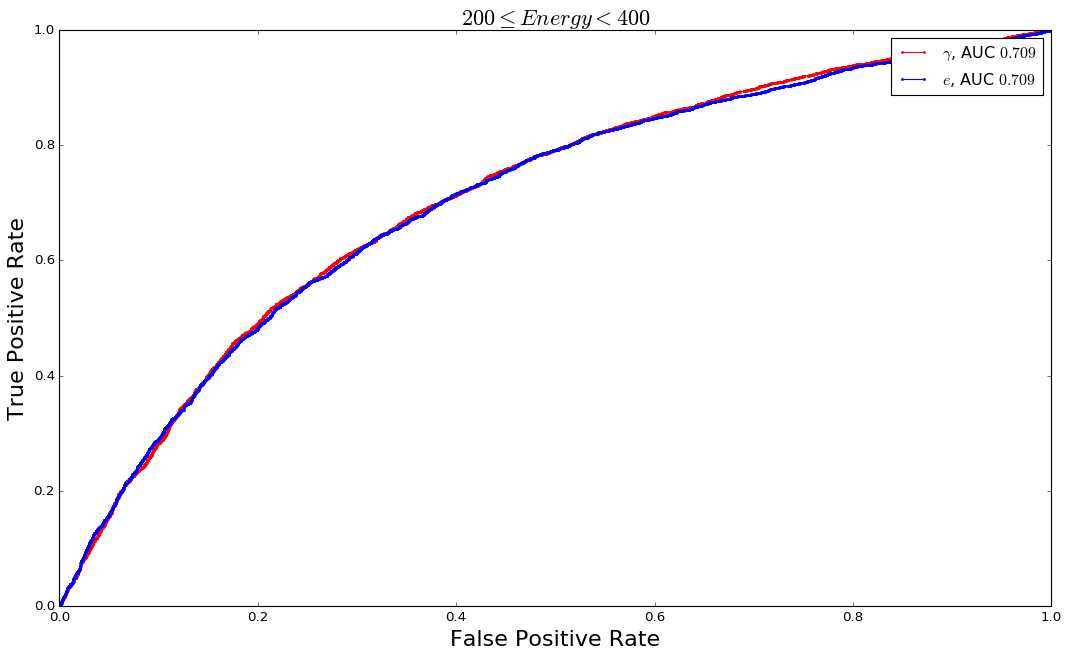

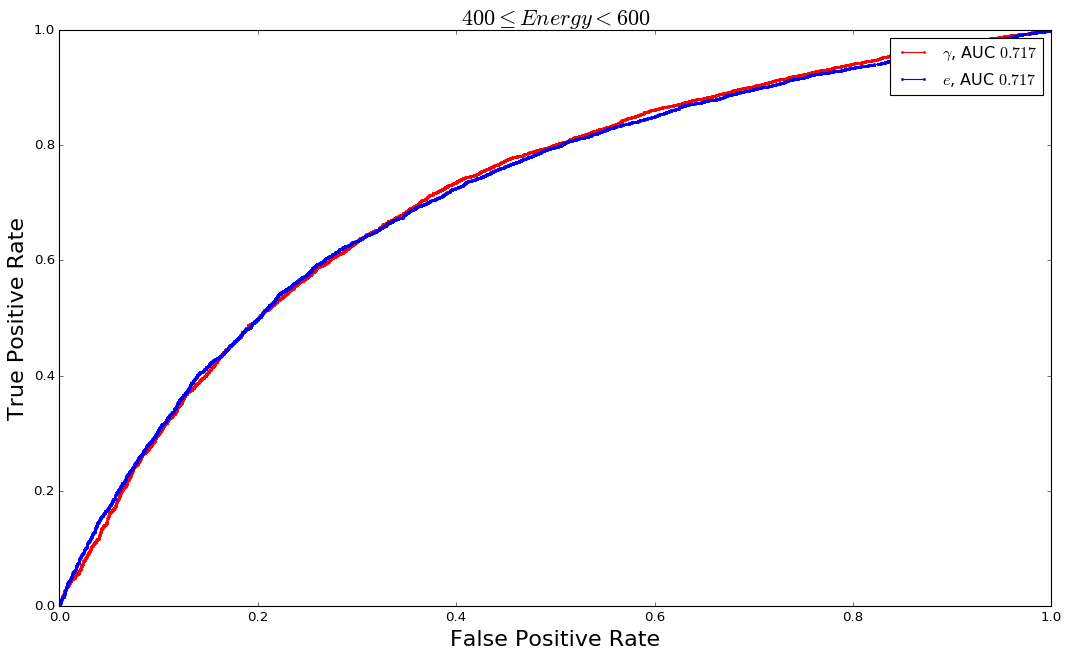

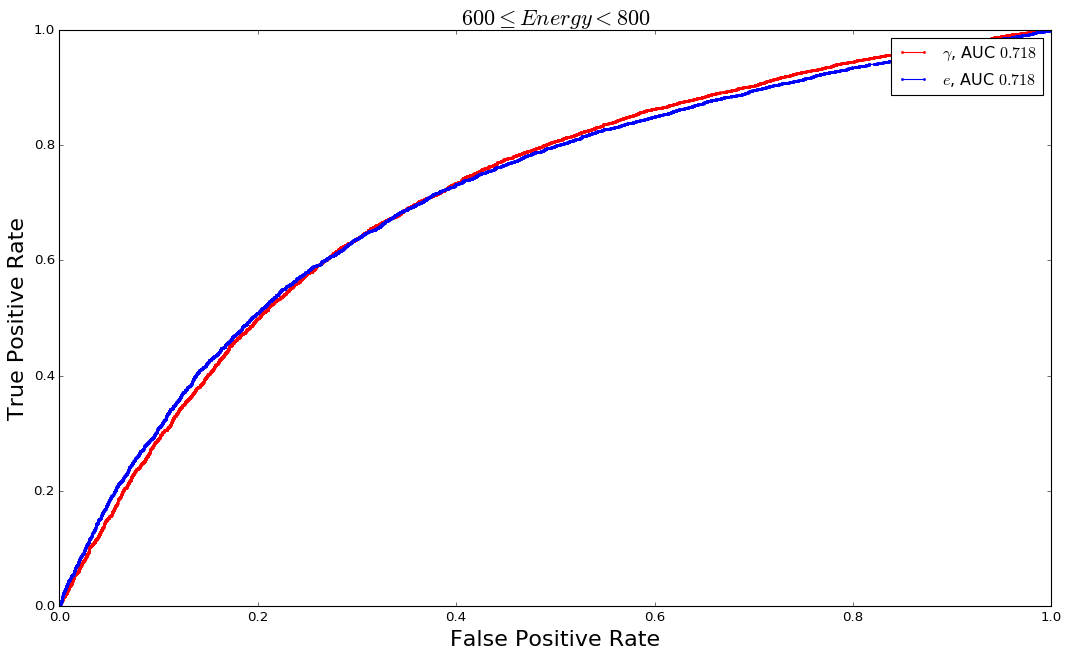

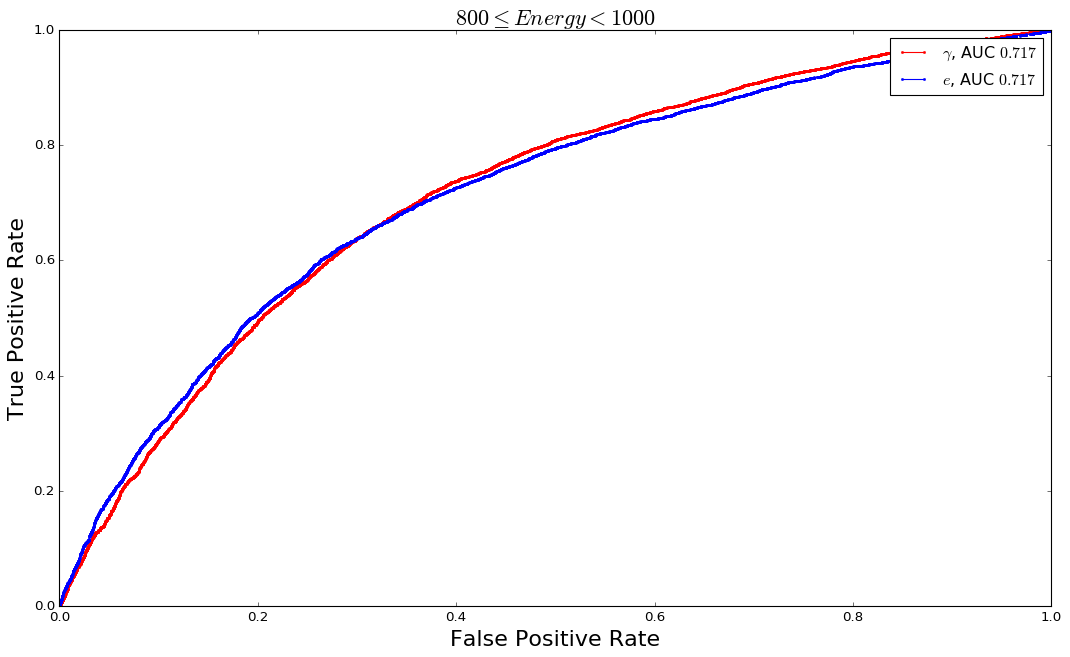

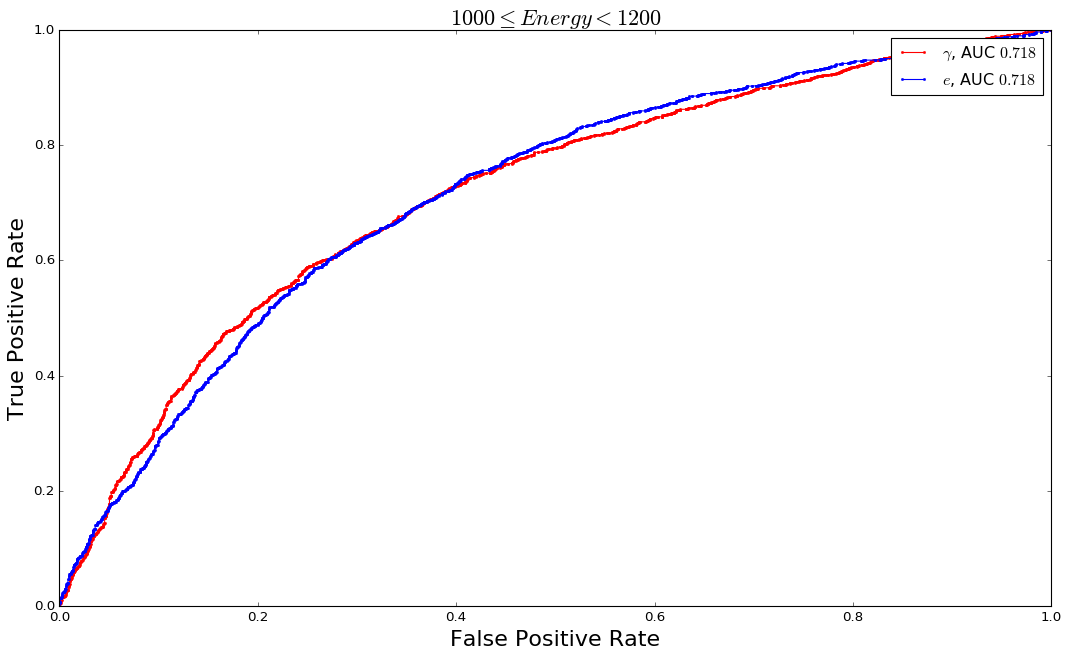

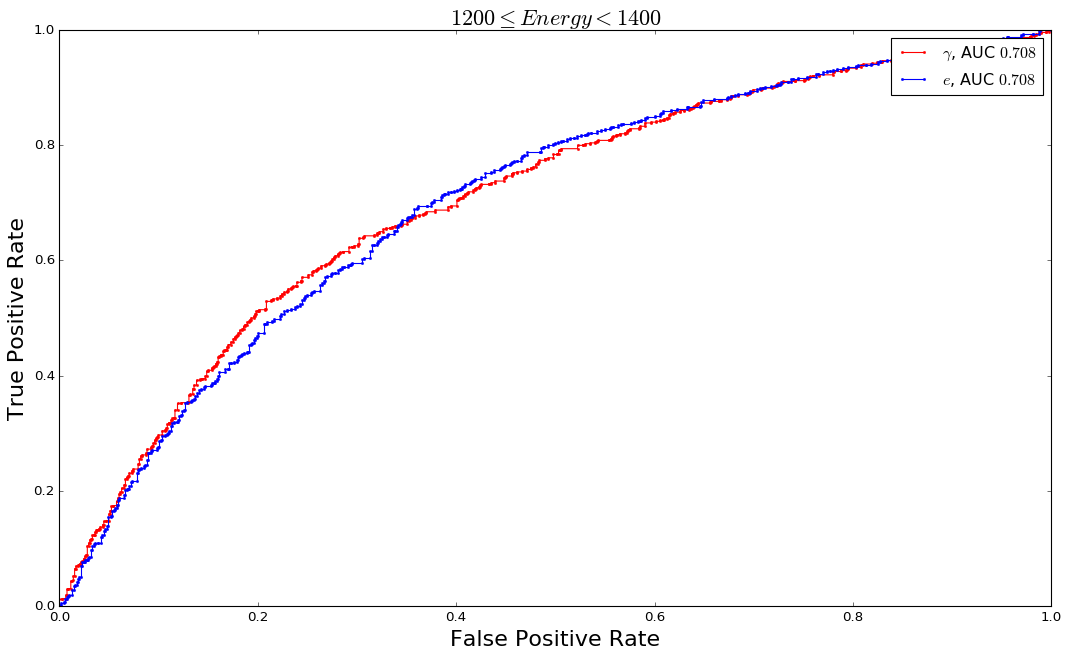

In [18]:
roc_auc_list = []
# Iterate over the energy intervals and plot the softmax overlap plots
for energy_lower, energy_upper in zip(energy_lb, energy_ub):
    roc_auc_list.append(plot_utils.plot_ROC_curve_one_vs_one(softmaxes, labels, energies,
                                         {"gamma":0, "e":1}, "gamma", "e", energy_lower, energy_upper))

In [20]:
print(roc_auc_list)

[(0.6964769732221407, 0.6935527655791396), (0.7092231044337548, 0.705992046244206), (0.7169919922664326, 0.7145935490402421), (0.7182956533187879, 0.7169492157445102), (0.7173769676441469, 0.7154409775397954), (0.7180899119911526, 0.7164505484818542), (0.7076191758884457, 0.7046441604829395)]


In [21]:
auc_gamma = [a[0] for a in roc_auc_list]
auc_e = [a[1] for a in roc_auc_list]

In [22]:
print(auc_gamma)
print(auc_e)

[0.6964769732221407, 0.7092231044337548, 0.7169919922664326, 0.7182956533187879, 0.7173769676441469, 0.7180899119911526, 0.7076191758884457]
[0.6935527655791396, 0.705992046244206, 0.7145935490402421, 0.7169492157445102, 0.7154409775397954, 0.7164505484818542, 0.7046441604829395]


In [33]:
auc_gamma_2 = []
for auc in auc_gamma:
    auc_gamma_2.append(auc)
    auc_gamma_2.append(auc)
  
auc_e_2 = []
for auc in auc_e:
    auc_e_2.append(auc)
    auc_e_2.append(auc)

In [34]:
energies_x = []
for low, high in zip(energy_lb, energy_ub):
    energies_x.append(low)
    energies_x.append(high)

In [35]:
print(energies_x)

[0, 200, 200, 400, 400, 600, 600, 800, 800, 1000, 1000, 1200, 1200, 1400]


In [36]:
print(auc_gamma_2)

[0.6964769732221407, 0.6964769732221407, 0.7092231044337548, 0.7092231044337548, 0.7169919922664326, 0.7169919922664326, 0.7182956533187879, 0.7182956533187879, 0.7173769676441469, 0.7173769676441469, 0.7180899119911526, 0.7180899119911526, 0.7076191758884457, 0.7076191758884457]


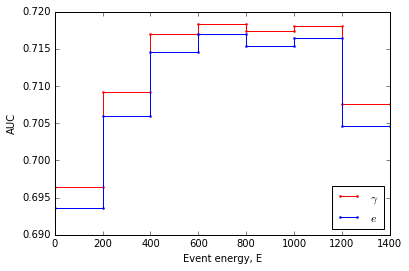

In [42]:
%matplotlib inline

plt.plot(energies_x, auc_gamma_2, color="r",
         label=r"$\{0}$".format("gamma"),
         linewidth=1.0, marker=".",
         markersize=4.0, markerfacecolor="r")

plt.plot(energies_x, auc_e_2, color="b",
         label=r"${0}$".format("e"),
         linewidth=1.0, marker=".",
         markersize=4.0, markerfacecolor="b")

plt.xlabel(r"Event energy, E")
plt.ylabel(r"AUC")
plt.legend(loc="lower right")

plt.show()